### Coastlines 

Programmatic approach to the Mandelbrot [approach](https://web.archive.org/web/20100628053656/http://classes.yale.edu/fractals/Panorama/Nature/Coastlines/CoastlinesStandard.html)

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from matplotlib import patches
from PIL import Image

sns.set(rc={'figure.figsize': (11.7, 8.27)})

#### Standard approach

We use 
\begin{align}
    L(d) = N \cdot d
\end{align}

We can approximate the area of a circle of radius one, which has circumference $2 \pi$, with the inscribed polygon,

\begin{align}
    L(n) = 2 \cdot n \cdot sin\left(\frac{\pi}{n}\right)
\end{align}

In [65]:
def per_inscribed(n):
    return 2 * n * np.sin(np.pi/n)

In [66]:
ns = np.arange(3, 50)
c = per_inscribed(ns)

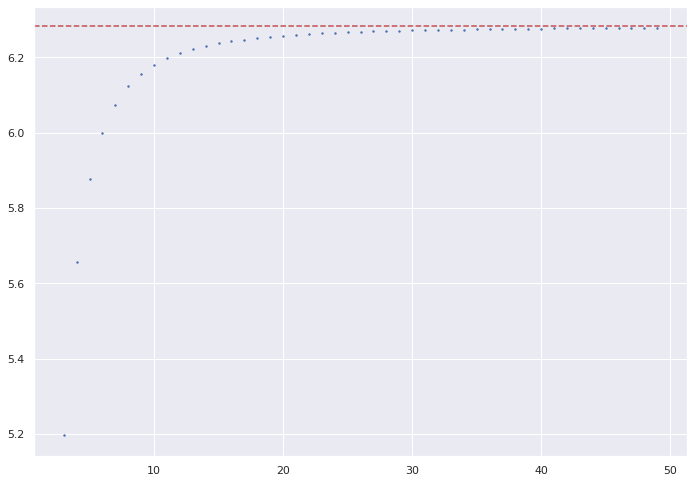

In [67]:
fig, ax = plt.subplots()
ax.scatter(ns, c, s=2)
ax.axhline(2*np.pi, linestyle='--', color='r')

fig.show()

#### Detrended fluctuation analysis

In [78]:
vix = np.genfromtxt('vix_data.csv', delimiter=',')
t, x = vix[:, 0], vix[:, 1]

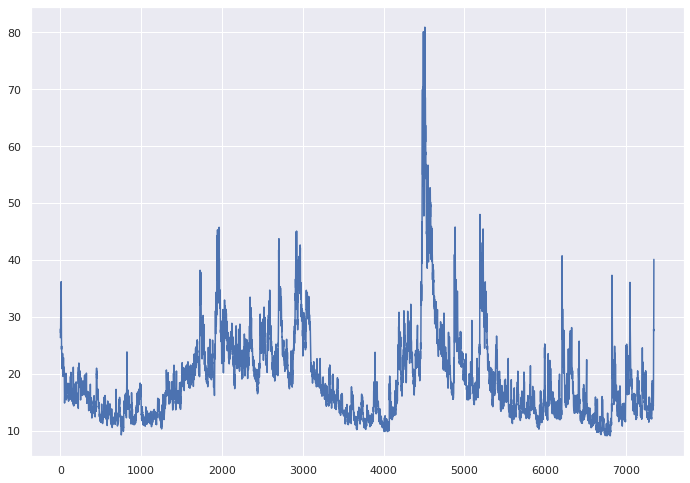

In [85]:
plt.plot(x)
plt.show()

In [276]:
def RS(sub_sample):
    n = len(sub_sample)
    m = np.mean(sub_sample)
    Y = sub_sample - m
    Z = [ np.sum(Y[:i]) for i in range(n)]
    R = np.max(Z) - np.min(Z)
    std_dev = np.std(sub_sample)
    
    return R/std_dev

def estimate_H(x):
    T = len(x)
    ns = (T / np.power(2, np.arange(2, 13))).astype(np.int)
    rs = np.zeros(ns.shape)
    size = np.zeros(ns.shape)
    
    for i, n in enumerate(ns):
        samples = np.array_split(x, n)
        sample_rs = [RS(sub) for sub in samples]
        rs[i] = np.mean(sample_rs)
        size[i] = np.mean([len(sub) for sub in samples])        
    
    log_n = np.log2(size)
    log_rs = np.log2(rs)
    
    slope = (log_n.T@log_rs)/(log_n.T@log_n)
    
    return slope, log_n, log_rs

In [280]:
H, log_n, log_rs = estimate_H(np.random.normal(0, 1, x.shape))
print("Random walk H:", H)

Random walk H: 0.5132991503832811


In [282]:
H, log_n, log_rs = estimate_H(x)
print("VIX H:", H)

VIX H: 0.8041884441190585
